In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('edgeslist.csv')

In [3]:
df

,Source,Destination,Weight
0,A,B,3.5
1,A,C,2.1
2,A,D,1.8
3,B,E,4.2
4,B,F,2.5
5,C,E,2.9
6,C,G,1.7
7,D,F,3.0
8,D,G,3.3
9,E,H,2.4


In [4]:
len(df)

35

In [5]:
'''edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))'''

"edges=[]\nfor i in range(len(df)):\n    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))"

In [6]:
def undirected_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d["weight"] for u,v,d in G.edges(data=True)})
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()
    nodes=list(G.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(G.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('Degree of nodes:-\n',G.degree( weight='weight'))
    degree=dict(G.degree( weight='weight'))
    degree_max=max(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_max}
    print("max degree node:",value)
    degree_min=min(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_min}
    print("min degree node:",value)

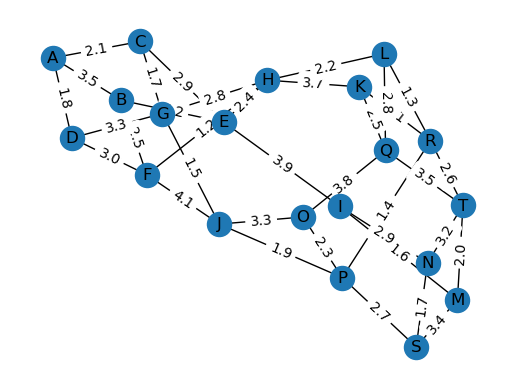

Nodes of the above graph are:-
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
Total no of Nodes are:- 20
Edges of the above graph are:-
 [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'E'), ('C', 'G'), ('D', 'F'), ('D', 'G'), ('E', 'H'), ('E', 'I'), ('F', 'H'), ('F', 'J'), ('G', 'H'), ('G', 'J'), ('H', 'K'), ('H', 'L'), ('I', 'M'), ('I', 'N'), ('J', 'O'), ('J', 'P'), ('K', 'Q'), ('K', 'R'), ('L', 'Q'), ('L', 'R'), ('M', 'S'), ('M', 'T'), ('N', 'S'), ('N', 'T'), ('O', 'P'), ('O', 'Q'), ('P', 'R'), ('P', 'S'), ('Q', 'T'), ('R', 'T')]
Total no of Edges are:-
 35
Degree of nodes:-
 [('A', 7.3999999999999995), ('B', 10.2), ('C', 6.7), ('D', 8.1), ('E', 13.4), ('F', 10.8), ('G', 9.3), ('H', 12.3), ('I', 8.4), ('J', 10.799999999999999), ('K', 9.3), ('L', 6.3), ('M', 7.0), ('N', 7.8), ('O', 9.399999999999999), ('P', 8.3), ('Q', 12.6), ('R', 8.4), ('S', 7.8), ('T', 11.299999999999999)]
max degree node: {'E'}
min degree n

In [7]:
undirected_graph(df)

In [8]:
def directed_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    pos = nx.spring_layout(H)  # Position the nodes using a spring layout algorithm
    nx.draw(H, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.9)
    nx.draw_networkx_edge_labels(H, pos, edge_labels={(u, v): d['weight'] for u, v, d in H.edges(data=True)}, font_size=8, font_color='black')  # Draw edge labels
    plt.show()
    nodes=list(H.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(H.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('out Degree',H.out_degree( weight='weight'))
    print('in Degree',H.in_degree( weight='weight'))
    degree=dict(H.degree( weight='weight'))
    max_out_degree=dict(H.out_degree(weight='weight'))
    degree_max=max(list(max_out_degree.values()))
    value = {i for i in max_out_degree if max_out_degree[i]==degree_max}
    print("max out degree node:",value)
    min_out_degree=dict(H.out_degree(weight='weight'))
    degree_min=min(list(min_out_degree.values()))
    value = {i for i in min_out_degree if min_out_degree[i]==degree_min}
    print("min out degree node:",value)
    max_in_degree=dict(H.in_degree(weight='weight'))
    degree_max=max(list(max_in_degree.values()))
    value = {i for i in max_in_degree if max_in_degree[i]==degree_max}
    print("max in degree node:",value)
    min_in_degree=dict(H.in_degree(weight='weight'))
    degree_min=min(list(min_in_degree.values()))
    value = {i for i in min_in_degree if min_in_degree[i]==degree_min}
    print("min in degree node:",value)

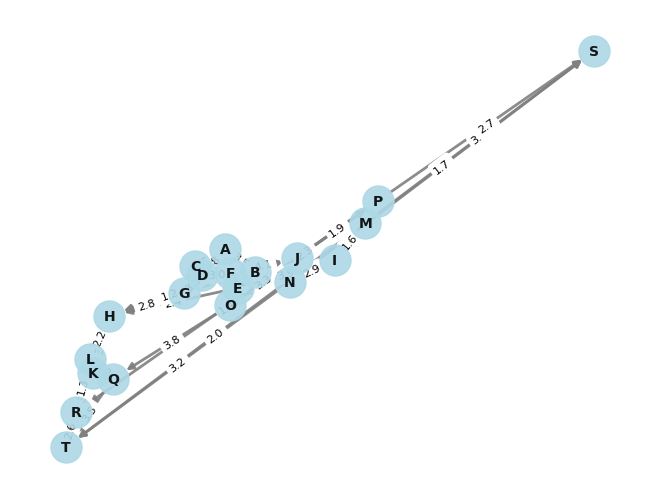

Nodes of the above graph are:-
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
Total no of Nodes are:- 20
Edges of the above graph are:-
 [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'E'), ('C', 'G'), ('D', 'F'), ('D', 'G'), ('E', 'H'), ('E', 'I'), ('F', 'H'), ('F', 'J'), ('G', 'H'), ('G', 'J'), ('H', 'K'), ('H', 'L'), ('I', 'M'), ('I', 'N'), ('J', 'O'), ('J', 'P'), ('K', 'Q'), ('K', 'R'), ('L', 'Q'), ('L', 'R'), ('M', 'S'), ('M', 'T'), ('N', 'S'), ('N', 'T'), ('O', 'P'), ('O', 'Q'), ('P', 'R'), ('P', 'S'), ('Q', 'T'), ('R', 'T')]
Total no of Edges are:-
 35
out Degree [('A', 7.3999999999999995), ('B', 6.7), ('C', 4.6), ('D', 6.3), ('E', 6.3), ('F', 5.3), ('G', 4.3), ('H', 5.9), ('I', 4.5), ('J', 5.199999999999999), ('K', 5.6), ('L', 4.1), ('M', 5.4), ('N', 4.9), ('O', 6.1), ('P', 4.1), ('Q', 3.5), ('R', 2.6), ('S', 0), ('T', 0)]
in Degree [('A', 0), ('B', 3.5), ('C', 2.1), ('D', 1.8), ('E', 7.1), ('F', 5.5), (

In [9]:
directed_graph(df)

In [10]:
def adjecency_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(G)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(G.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
 
    print("Sum for Node {} is {}".format(node,sum1))

In [11]:
adjecency_matrix_undirected(df)

C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\2877546678.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix_undirected_graph=nx.adjacency_matrix(G)


     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  3.5  2.1  1.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   3.5  0.0  0.0  0.0  4.2  2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   2.1  0.0  0.0  0.0  2.9  0.0  1.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   1.8  0.0  0.0  0.0  0.0  3.0  3.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  4.2  2.9  0.0  0.0  0.0  0.0  2.4  3.9  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  2.5  0.0  3.0  0.0  0.0  0.0  1.2  0.0  4.1  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  1.7  3.3  0.0  0.0  0.0  2.8  0.0  1.5  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  2.4  1.2  2.8  0.0  0.0  0.0  3.7  2.2  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  3.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.6  2.9  0.0   
9   0.0  0.0  0.0  0.0  0.0  4.1  1.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.3   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [12]:
def adjecency_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H=nx.DiGraph()
    H.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(H)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[i][node])
    print("Sum for Node {} is {}".format(node,sum1))

In [13]:
adjecency_matrix_directed(df)

C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\2107974824.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix_undirected_graph=nx.adjacency_matrix(H)


     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   3.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   2.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   1.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  4.2  2.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  2.5  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  1.7  3.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  2.4  1.2  2.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  3.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  4.1  1.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [14]:
def centrality_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweeness_centrality = nx.closeness_centrality(G)
    eigen_vector_centrality = nx.eigenvector_centrality(G)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [15]:
centrality_matrix_undirected(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality  \
A           0.157895              0.306452               0.306452   
B           0.157895              0.380000               0.380000   
C           0.157895              0.380000               0.380000   
D           0.157895              0.333333               0.333333   
E           0.210526              0.431818               0.431818   
F           0.210526              0.422222               0.422222   
G           0.210526              0.422222               0.422222   
H           0.263158              0.463415               0.463415   
I           0.157895              0.387755               0.387755   
J           0.210526              0.441860               0.441860   
K           0.157895              0.422222               0.422222   
L           0.157895              0.422222               0.422222   
M           0.157895              0.372549               0.372549   
N           0.157895              

In [16]:
def centrality_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(H)
    closeness_centrality = nx.closeness_centrality(H)
    betweeness_centrality = nx.closeness_centrality(H)
    #eigen_vector_centrality = nx.eigenvector_centrality(H)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    #udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [17]:
centrality_matrix_directed(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality
A           0.157895              0.000000               0.000000
B           0.157895              0.052632               0.052632
C           0.157895              0.052632               0.052632
D           0.157895              0.052632               0.052632
E           0.210526              0.118421               0.118421
F           0.210526              0.118421               0.118421
G           0.210526              0.118421               0.118421
H           0.263158              0.214912               0.214912
I           0.157895              0.105263               0.105263
J           0.210526              0.172249               0.172249
K           0.157895              0.168421               0.168421
L           0.157895              0.168421               0.168421
M           0.157895              0.101215               0.101215
N           0.157895              0.101215               0.101215
O         

In [18]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
G = nx.Graph()
G.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.closeness_centrality(G)
eigen_vector_centrality = nx.eigenvector_centrality(G)
udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
udf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.157895,0.306452,0.306452,0.155296
B,0.157895,0.380000,0.380000,0.184037
C,0.157895,0.380000,0.380000,0.184037
D,0.157895,0.333333,0.333333,0.195390
E,0.210526,0.431818,0.431818,0.235626
F,0.210526,0.422222,0.422222,0.276819
G,0.210526,0.422222,0.422222,0.276819
H,0.263158,0.463415,0.463415,0.346336
I,0.157895,0.387755,0.387755,0.140513
J,0.210526,0.441860,0.441860,0.278621


In [19]:
def find_node_min_centarlity(udf,cent_name):
    min = 100
    node_min = -1
    for i in range(len(udf)):
        if udf[cent_name][i] < min:
            min =  udf[cent_name][i]
            node_min = i
        return node_min,min

def find_node_max_centarlity(udf,cent_name):
    max = 0
    node_max = -1
    for i in range(len(udf)):
        if udf[cent_name][i] > max:
            max =  udf[cent_name][i]
            node_max = i
        return node_max,max

In [20]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.15789473684210525
0 0.15789473684210525


In [21]:
node_min,min = find_node_min_centarlity(udf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3064516129032258
0 0.3064516129032258


In [22]:
node_min,min = find_node_min_centarlity(udf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3064516129032258
0 0.3064516129032258


In [23]:
node_min,min = find_node_min_centarlity(udf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(udf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.15529611691733286
0 0.15529611691733286


In [24]:
udf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

udf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [25]:
udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = udf_min_max.columns,name = 'Eigen Vector Centrality'))
udf_min_max

C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\4159790018.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\4159790018.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\4159790018.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
C:\Users\rajat\AppDa

,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.157895,0,0.157895
Closeness Centrality,0,0.306452,0,0.306452
Betweeness Centrality,0,0.306452,0,0.306452
Eigen Vector Centrality,0,0.155296,0,0.155296


In [26]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
H = nx.DiGraph()
H.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(H)
closeness_centrality = nx.closeness_centrality(H)
betweeness_centrality = nx.closeness_centrality(H)
#eigen_vector_centrality = nx.eigenvector_centrality(H)
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = udf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
#udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.157895,0.306452,0.000000,0.155296
B,0.157895,0.380000,0.052632,0.184037
C,0.157895,0.380000,0.052632,0.184037
D,0.157895,0.333333,0.052632,0.195390
E,0.210526,0.431818,0.118421,0.235626
F,0.210526,0.422222,0.118421,0.276819
G,0.210526,0.422222,0.118421,0.276819
H,0.263158,0.463415,0.214912,0.346336
I,0.157895,0.387755,0.105263,0.140513
J,0.210526,0.441860,0.172249,0.278621


In [27]:
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = ddf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = ddf.assign(Betweeness_Centrality= betweeness_centrality.values())
#ddf = ddf.assign(Eigen_Vector_Centrality= dg_eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality
A,0.157895,0.000000,0.000000
B,0.157895,0.052632,0.052632
C,0.157895,0.052632,0.052632
D,0.157895,0.052632,0.052632
E,0.210526,0.118421,0.118421
F,0.210526,0.118421,0.118421
G,0.210526,0.118421,0.118421
H,0.263158,0.214912,0.214912
I,0.157895,0.105263,0.105263
J,0.210526,0.172249,0.172249


In [28]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.15789473684210525
0 0.15789473684210525


In [29]:
node_min,min = find_node_min_centarlity(ddf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.0
-1 0


In [30]:
node_min,min = find_node_min_centarlity(ddf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.0
-1 0


In [31]:
ddf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

ddf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [32]:
ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))
#ddf_min_max = ddf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = ddf_min_max.columns,name = 'Eigen Vector Centrality'))
ddf_min_max

C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\2392606401.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\2392606401.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23876\2392606401.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))


,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.157895,0,0.157895
Closeness Centrality,0,0.000000,-1,0.000000
Betweeness Centrality,0,0.000000,-1,0.000000
